In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [2]:
data = pd.read_csv('pybaseball_2022.csv')
data = data[data['hit_distance_sc'].notna()]

In [3]:
data = data[data['events'].isin(["field_out", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed', "hc_x", "hc_y","pfx_x", "pfx_z", "release_speed", "events", "home_team", "pitch_type", "stand", "p_throws", "woba_value"]]

In [5]:
data = data[data['hc_x'].notna()]
data = data[data['hc_y'].notna()]
data = data[data['pfx_x'].notna()]
data = data[data['pfx_z'].notna()]
data = data[data['launch_angle'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['release_speed'].notna()]

In [6]:
data['launch_speed_percentile'] = data['launch_speed'].rank(pct=True)

In [7]:
# Top EV

Top_25_launch_speed_percentile = data.loc[data['launch_speed_percentile'] > 0.74]

Righty_Top_25_launch_speed_percentile = Top_25_launch_speed_percentile[Top_25_launch_speed_percentile['stand'].isin(["R"])]

In [8]:
events_renamed = {
    'home_run':'Home Run',
    'triple':'Triple', 
    'field_out' :'Field Out',
    'single':'Single',
    'double':'Double'
}

data['Events'] = data['events'].map(events_renamed)

pal = {
    
    'Home Run':'red',
    'Triple':'red', 
    'Field Out':'#2288b6',
    'Single':'yellow',
    'Double':'orange'
}

In [9]:
Righty_Top_25_launch_speed_percentile

,hit_distance_sc,launch_angle,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,events,home_team,pitch_type,stand,p_throws,woba_value,launch_speed_percentile
205,44.0,-1.0,103.2,103.05,151.06,1.27,-1.02,79.5,field_out,HOU,KC,R,R,0.00,0.878090
227,244.0,13.0,109.5,57.58,127.76,0.40,-0.66,82.0,double,HOU,CU,R,R,1.25,0.984198
267,299.0,17.0,104.4,224.58,103.12,-1.55,1.01,95.6,double,HOU,SI,R,R,1.25,0.907100
427,378.0,32.0,106.9,34.10,75.88,-1.47,1.33,94.1,home_run,NYY,SI,R,R,2.00,0.954540
481,393.0,22.0,111.7,141.17,40.42,-1.60,-0.32,87.9,field_out,NYY,CH,R,R,0.00,0.994967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740254,366.0,17.0,108.6,98.51,52.88,-1.18,0.68,93.9,double,MIA,SI,R,R,1.25,0.976414
740313,399.0,27.0,103.0,195.56,39.61,-1.35,-0.11,94.1,home_run,PIT,SI,R,R,2.00,0.873068
740342,227.0,15.0,100.7,54.43,113.51,0.44,-0.90,77.2,double,PIT,CU,R,R,1.25,0.807325
740394,389.0,28.0,107.8,20.23,81.34,1.21,0.96,93.0,home_run,PIT,FF,R,L,2.00,0.967530


# calibrate strike zone

In [10]:
Righty_Top_25_launch_speed_percentile_pitch_types = Righty_Top_25_launch_speed_percentile[Righty_Top_25_launch_speed_percentile['pitch_type'].isin(["FF", "CU"])]

Text(0.5, 1.0, "75th Percentile EV, pfx catcher's view")

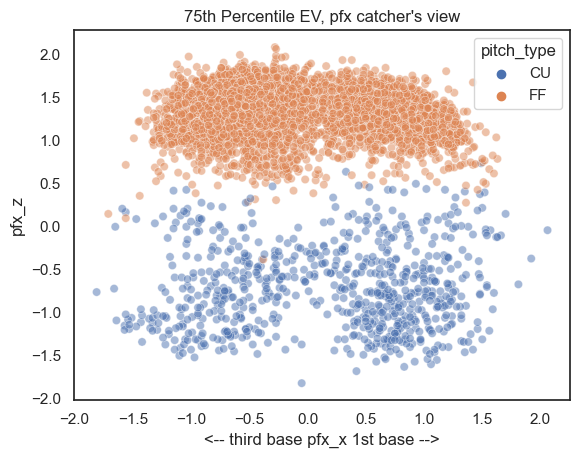

In [11]:
sns.set_theme(style="white")

chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile_pitch_types, 
                        x=Righty_Top_25_launch_speed_percentile_pitch_types.pfx_x, 
                        y=Righty_Top_25_launch_speed_percentile_pitch_types.pfx_z,  
                        hue = Righty_Top_25_launch_speed_percentile_pitch_types.pitch_type, 
                        alpha = 0.5)

#chart.invert_yaxis()


chart.set(xlabel='<-- third base pfx_x 1st base -->')
chart.set(ylabel='pfx_z')
plt.title("75th Percentile EV, pfx catcher's view")

In [12]:
#Righty_Top_25_launch_speed_percentile['zone_loc'] = ''

In [13]:
def my_function(row):
    if ((row['pfx_x'] < 0) and (row['pfx_z'] > 0)):
        return 'Inside_Up'
    elif ((row['pfx_x'] < 0) and (row['pfx_z'] < 0)):
        return 'Inside_down'
    elif ((row['pfx_x'] > 0) and (row['pfx_z'] < 0)):
        return 'away_down'
    else:
        return 'away_up'

In [14]:
Righty_Top_25_launch_speed_percentile['zone_loc'] = Righty_Top_25_launch_speed_percentile.apply(my_function, axis=1)


In [15]:
def my_function_up_down(row):
    if row['pfx_z'] > 0:
        return 'Up'
    else:
        return 'Down'


In [16]:
Righty_Top_25_launch_speed_percentile['zone_up_down'] = Righty_Top_25_launch_speed_percentile.apply(my_function_up_down, axis=1)


Text(0.5, 1.0, "75th Percentile EV, pfx catcher's view")

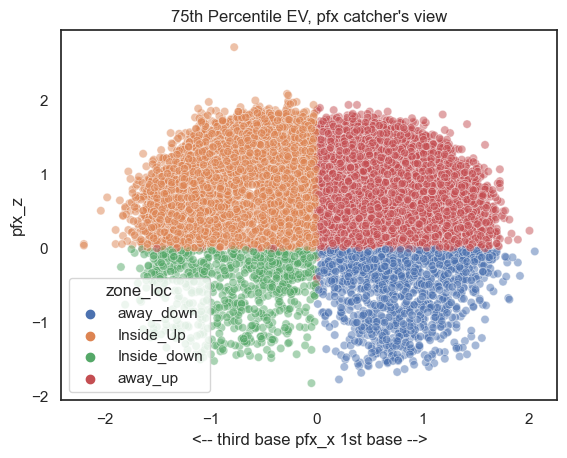

In [17]:
sns.set_theme(style="white")

chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile, 
                        x=Righty_Top_25_launch_speed_percentile.pfx_x, 
                        y=Righty_Top_25_launch_speed_percentile.pfx_z,  
                        hue = Righty_Top_25_launch_speed_percentile.zone_loc, 
                        alpha = 0.5)

#chart.invert_yaxis()


chart.set(xlabel='<-- third base pfx_x 1st base -->')
chart.set(ylabel='pfx_z')
plt.title("75th Percentile EV, pfx catcher's view")

## lower just have higher pitch count?

# above look at called strikes

Text(0.5, 1.0, '80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away')

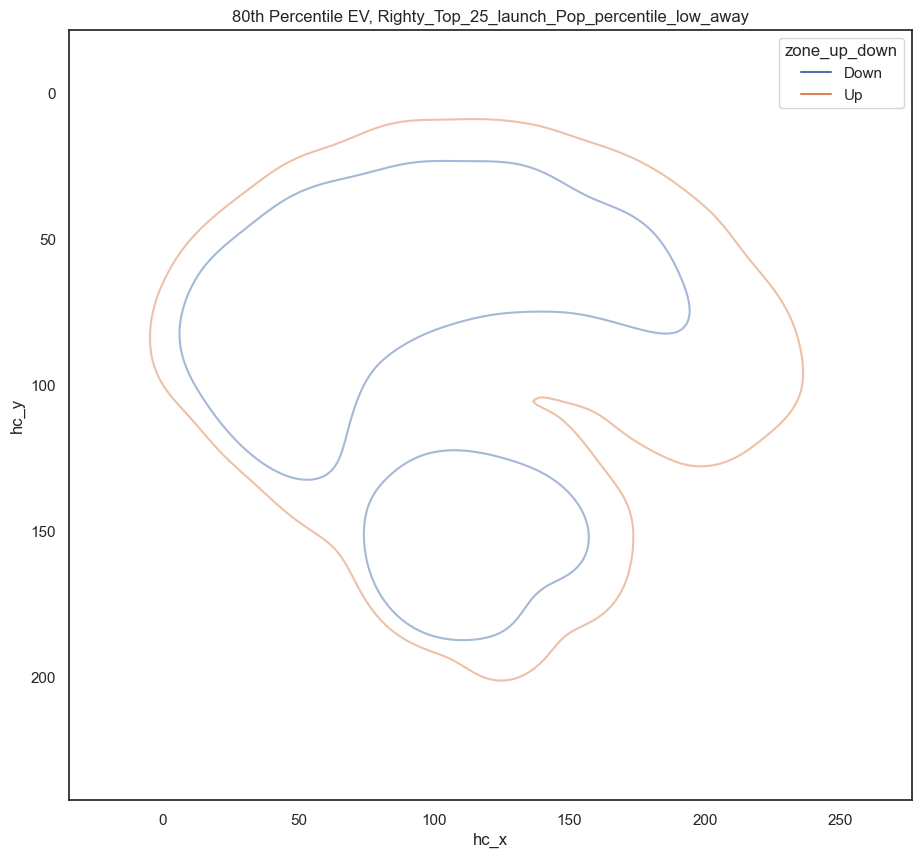

In [18]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.kdeplot(data = Righty_Top_25_launch_speed_percentile, 
                        x=Righty_Top_25_launch_speed_percentile.hc_x, 
                        y=Righty_Top_25_launch_speed_percentile.hc_y,  
                        hue = Righty_Top_25_launch_speed_percentile.zone_up_down, 
                        alpha = 0.5,
                        levels=2)

chart.invert_yaxis()


chart.set(xlabel='hc_x')
chart.set(ylabel='hc_y')
plt.title("80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away")

In [19]:
Righty_Top_25_launch_speed_percentile_hrs = Righty_Top_25_launch_speed_percentile[Righty_Top_25_launch_speed_percentile['events'].isin(["home_run"])]

Text(0.5, 1.0, '80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away')

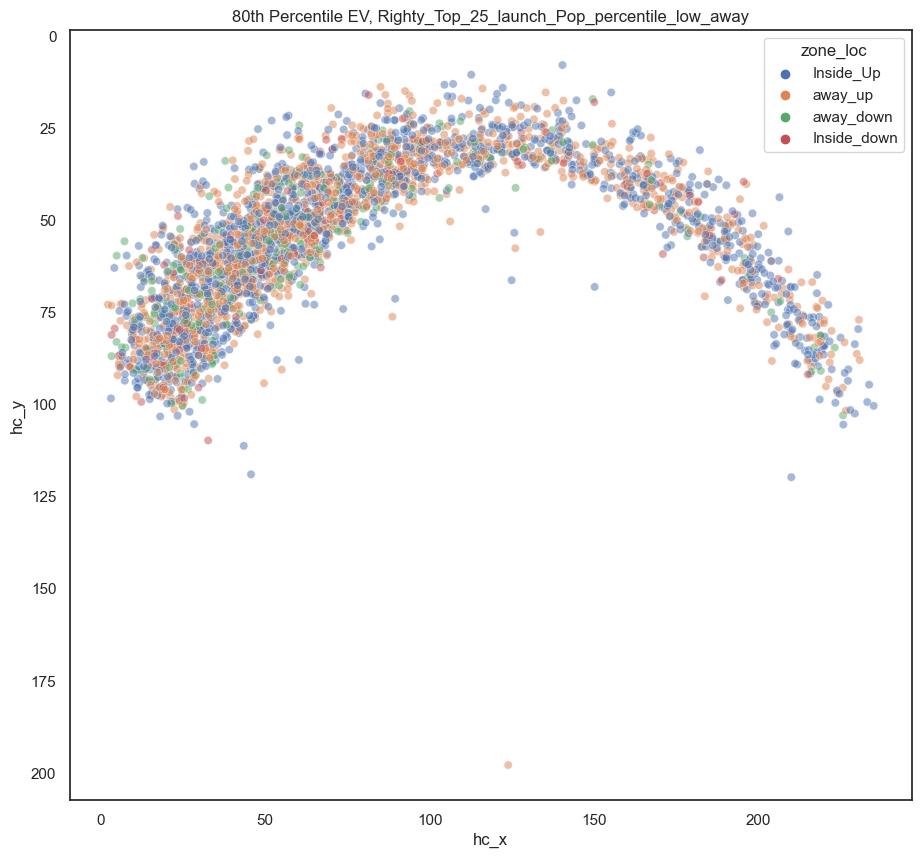

In [20]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile_hrs, 
                        x=Righty_Top_25_launch_speed_percentile_hrs.hc_x, 
                        y=Righty_Top_25_launch_speed_percentile_hrs.hc_y,  
                        hue = Righty_Top_25_launch_speed_percentile_hrs.zone_loc, 
                        alpha = 0.5)
                        #levels=3)

chart.invert_yaxis()


chart.set(xlabel='hc_x')
chart.set(ylabel='hc_y')
plt.title("80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away")

<AxesSubplot:xlabel='hc_y', ylabel='Density'>

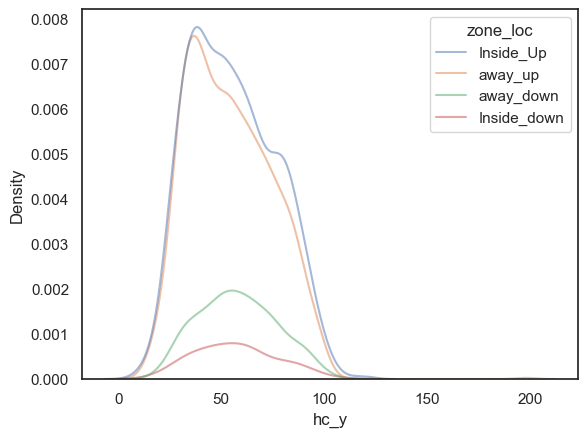

In [21]:
sns.kdeplot(data = Righty_Top_25_launch_speed_percentile_hrs, 
                x=Righty_Top_25_launch_speed_percentile_hrs.hc_y, 
                hue = Righty_Top_25_launch_speed_percentile_hrs.zone_loc, 
                alpha = 0.5)
                #levels=3)

# maybe compare up and down first

In [22]:
test2 = Righty_Top_25_launch_speed_percentile.groupby(['zone_loc','launch_angle'])['launch_speed'].quantile(0.75).to_frame()
test2

launch_speed
zone_loc  launch_angle              
Inside_Up -45.0              103.000
          -43.0              103.925
          -41.0              100.600
          -40.0              102.700
          -39.0              105.600
...                              ...
away_up    63.0               99.850
           64.0              100.200
           65.0              102.700
           66.0               99.050
           69.0               98.900

[393 rows x 1 columns]

In [23]:
test2 = test2.rename_axis(['zone_loc','launch_angle']).reset_index()
test2

,zone_loc,launch_angle,launch_speed
0,Inside_Up,-45.0,103.000
1,Inside_Up,-43.0,103.925
2,Inside_Up,-41.0,100.600
3,Inside_Up,-40.0,102.700
4,Inside_Up,-39.0,105.600
...,...,...,...
388,away_up,63.0,99.850
389,away_up,64.0,100.200
390,away_up,65.0,102.700
391,away_up,66.0,99.050


In [24]:
test2 = test2.loc[test2['launch_angle'] > 15]

test2 = test2.loc[test2['launch_angle'] < 50]

test2

,zone_loc,launch_angle,launch_speed
58,Inside_Up,16.0,107.800
59,Inside_Up,17.0,107.025
60,Inside_Up,18.0,106.925
61,Inside_Up,19.0,106.500
62,Inside_Up,20.0,106.400
...,...,...,...
370,away_up,45.0,102.575
371,away_up,46.0,103.475
372,away_up,47.0,101.025
373,away_up,48.0,102.800


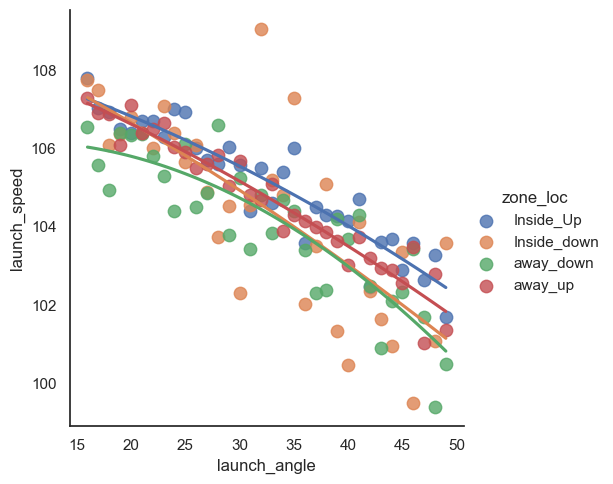

In [25]:
sns.lmplot(data = test2, 
                x="launch_angle", 
                y="launch_speed",  
                hue = "zone_loc", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

In [26]:
perticle_of_each_la_test = Righty_Top_25_launch_speed_percentile.groupby('launch_angle').quantile(.80)


In [27]:
perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile
launch_angle,,,,,,,,,
-45.0,1.8,102.96,109.956,155.666,0.732,0.904,93.06,0.0,0.872027
-43.0,1.8,103.98,106.126,171.180,-0.380,0.772,96.14,0.0,0.897027
-41.0,2.8,100.50,112.952,166.430,0.670,0.608,89.66,0.0,0.801391
-40.0,3.0,102.70,116.400,173.590,-1.340,0.060,88.80,0.0,0.865027
-39.0,2.2,104.06,134.946,169.446,0.742,0.828,97.50,0.0,0.897673
...,...,...,...,...,...,...,...,...,...
66.0,174.0,99.60,142.060,169.600,0.430,1.360,94.60,0.0,0.774303
67.0,161.6,98.78,98.620,157.952,-0.422,1.560,93.82,0.0,0.749107
68.0,138.0,98.58,123.700,165.758,-0.492,1.224,90.02,0.0,0.742753


In [28]:
perticle_of_each_la_test['launch_angle'] = perticle_of_each_la_test.index
perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile,launch_angle
launch_angle,,,,,,,,,,
-45.0,1.8,102.96,109.956,155.666,0.732,0.904,93.06,0.0,0.872027,-45.0
-43.0,1.8,103.98,106.126,171.180,-0.380,0.772,96.14,0.0,0.897027,-43.0
-41.0,2.8,100.50,112.952,166.430,0.670,0.608,89.66,0.0,0.801391,-41.0
-40.0,3.0,102.70,116.400,173.590,-1.340,0.060,88.80,0.0,0.865027,-40.0
-39.0,2.2,104.06,134.946,169.446,0.742,0.828,97.50,0.0,0.897673,-39.0
...,...,...,...,...,...,...,...,...,...,...
66.0,174.0,99.60,142.060,169.600,0.430,1.360,94.60,0.0,0.774303,66.0
67.0,161.6,98.78,98.620,157.952,-0.422,1.560,93.82,0.0,0.749107,67.0
68.0,138.0,98.58,123.700,165.758,-0.492,1.224,90.02,0.0,0.742753,68.0


In [29]:
perticle_of_each_la_test = perticle_of_each_la_test.loc[perticle_of_each_la_test['launch_angle'] > 15]

perticle_of_each_la_test = perticle_of_each_la_test.loc[perticle_of_each_la_test['launch_angle'] < 50]

perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile,launch_angle
launch_angle,,,,,,,,,,
16.0,345.0,108.12,159.102,98.634,0.814,1.340,94.12,1.25,0.971560,16.0
17.0,352.0,107.60,170.320,93.210,0.830,1.390,94.50,1.25,0.965042,17.0
18.0,363.0,107.30,160.252,92.200,0.884,1.380,94.50,1.25,0.960818,18.0
19.0,374.0,107.40,164.566,87.352,0.766,1.336,94.60,1.25,0.962324,19.0
20.0,385.0,107.42,167.332,81.768,0.782,1.360,94.30,1.25,0.962604,20.0
21.0,393.0,107.08,169.414,80.404,0.858,1.380,94.50,2.00,0.957333,21.0
22.0,400.6,107.30,161.674,79.310,0.920,1.336,93.90,2.00,0.960818,22.0
23.0,407.0,107.10,168.810,75.854,0.892,1.330,94.10,2.00,0.957648,23.0
24.0,411.0,107.20,162.450,74.860,0.930,1.340,93.90,2.00,0.959239,24.0


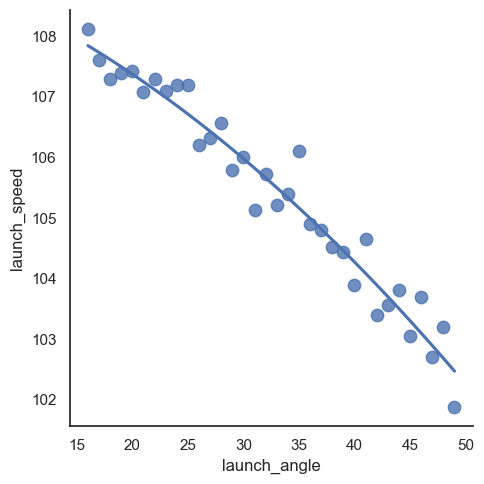

In [30]:
sns.lmplot(data = perticle_of_each_la_test, 
                x="launch_angle", 
                y="launch_speed",  
                # hue = "zone", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

# save inside and away for pull%

In [31]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = Righty_Top_25_launch_speed_percentile.groupby(["zone_loc","launch_angle"])["hit_distance_sc", "launch_angle", "launch_speed","zone_loc"].mean()

C:\Users\decla\AppData\Local\Temp\ipykernel_11312\1300495662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_la_ev_Righty_Top_25_launch_speed_percentile = Righty_Top_25_launch_speed_percentile.groupby(["zone_loc","launch_angle"])["hit_distance_sc", "launch_angle", "launch_speed","zone_loc"].mean()


In [32]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.loc[gb_la_ev_Righty_Top_25_launch_speed_percentile['launch_angle'] < 60]

gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.loc[gb_la_ev_Righty_Top_25_launch_speed_percentile['launch_angle'] > 0]


In [33]:
gb_la_ev_Righty_Top_25_launch_speed_percentile

hit_distance_sc  launch_angle  launch_speed
zone_loc  launch_angle                                             
Inside_Up 1.0                 61.241935           1.0    103.719355
          2.0                 69.635417           2.0    104.059375
          3.0                 83.913580           3.0    104.146914
          4.0                 98.227273           4.0    104.015909
          5.0                112.084337           5.0    103.850602
...                                 ...           ...           ...
away_up   55.0               250.545455          55.0    100.909091
          56.0               254.000000          56.0    105.200000
          57.0               238.500000          57.0    101.825000
          58.0               243.500000          58.0    101.250000
          59.0               220.000000          59.0    101.100000

[224 rows x 3 columns]

In [34]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.rename_axis(['pitch_zone','launch_angle']).reset_index()

ValueError: cannot insert launch_angle, already exists

In [ ]:
gb_la_ev_Righty_Top_25_launch_speed_percentile

,zone,lanchf,hit_distance_sc,launch_angle,launch_speed
0,Inside_Up,1.0,61.881890,1.0,104.429134
1,Inside_Up,2.0,71.717514,2.0,104.590395
2,Inside_Up,3.0,84.988889,3.0,104.668333
3,Inside_Up,4.0,98.937853,4.0,104.295480
4,Inside_Up,5.0,114.952381,5.0,104.770370
...,...,...,...,...,...
218,away_up,55.0,248.400000,55.0,101.140000
219,away_up,56.0,254.000000,56.0,105.200000
220,away_up,57.0,238.500000,57.0,101.825000
221,away_up,58.0,269.000000,58.0,103.800000


<Axes: xlabel='lanchf', ylabel='launch_speed'>

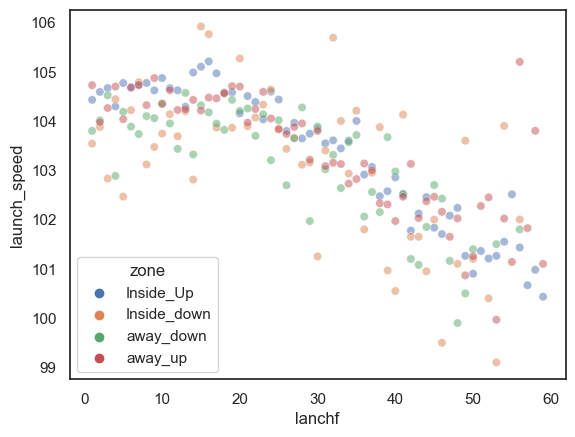

In [ ]:
sns.scatterplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)

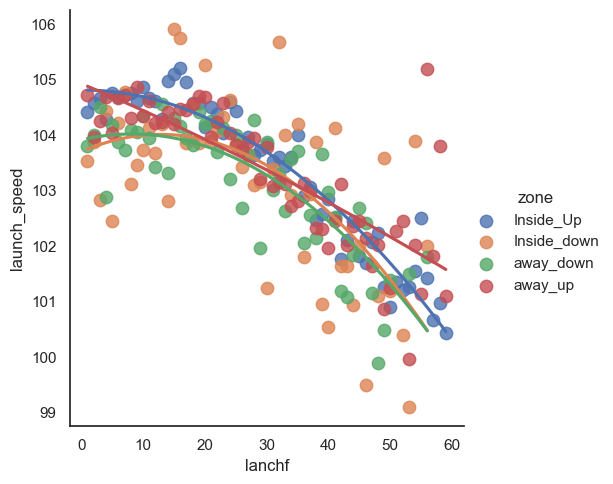

In [ ]:
sns.lmplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x="lanchf", 
                y="launch_speed",  
                hue = "zone", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

<Axes: xlabel='lanchf', ylabel='launch_speed'>

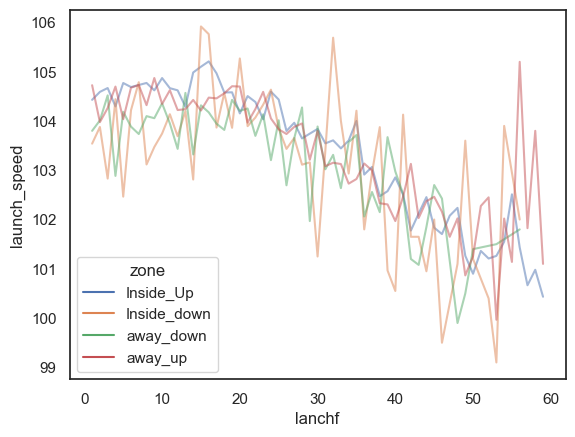

In [ ]:
sns.lineplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)

<Axes: xlabel='lanchf', ylabel='launch_speed'>

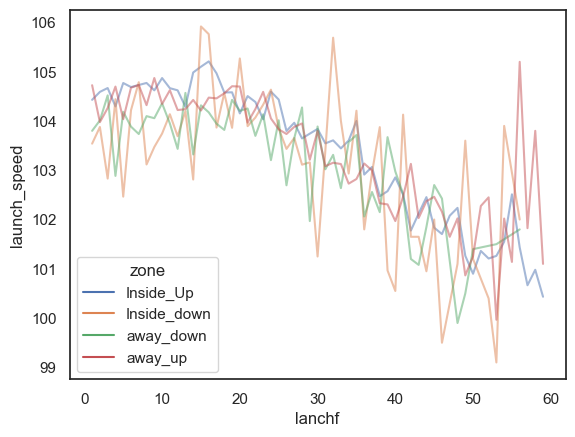

In [ ]:
sns.lineplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)